In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

In [2]:
df = pd.read_csv('../datasets/master_players_stats_bio_clusters_pca.csv', index_col=0)
df.shape
df.sample(5)

year_groupby = df.groupby('year')

(6541, 145)

,player_id,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28
player,,,,,,,,,,,,,,,,,,,,,
Patty Mills 2020,millspa02,PG,31,SAS,66,1485,14.8,0.592,0.674,0.187,...,-0.400950,0.630518,0.067902,-0.163402,-0.091093,-0.452275,-0.459293,0.032509,0.511209,-0.310228
Buddy Hield 2019,hieldbu01,SG,26,SAC,82,2615,17.5,0.587,0.479,0.142,...,0.498609,0.438195,-0.078680,0.435452,0.592964,-0.192711,0.001435,0.507455,-0.098000,0.155340
Troy Hudson 2000,hudsotr01,PG,23,LAC,62,1592,11.6,0.468,0.357,0.176,...,-1.102223,0.139916,-0.236072,-0.157204,-0.086110,-0.436031,0.128069,-0.175715,0.241128,0.135433
Devin Harris 2011,harride01,PG,27,TOT,71,2254,17.2,0.545,0.221,0.494,...,0.581527,-0.015841,-0.252989,-0.383003,0.032675,0.187079,0.019136,-0.072837,-0.160859,0.222456
Zaza Pachulia 2004,pachuza01,C,19,ORL,59,664,10.8,0.452,0.000,0.514,...,0.152751,-0.025401,0.481013,1.206255,0.703385,0.118296,-0.543215,0.228697,-0.360987,0.828151


### Convert 'missing salary' to np.nan, save master dataset

In [14]:
# df[df['salary']=='missing']

,player_id,pos,age,team_id,g,mp,per,ts_pct,fg3a_per_fga_pct,fta_per_fga_pct,...,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24,pc_25,pc_26,pc_27,pc_28
player,,,,,,,,,,,,,,,,,,,,,
Felipe López 2000,lopezfe01,SG,25,VAN,65,781,11.9,0.473,0.069,0.418,...,0.796203,0.576897,-0.130595,0.084114,0.225164,-0.415155,-0.142536,0.519473,0.620295,0.431103
Ira Newble 2002,newblir01,SF,27,ATL,42,1273,11.5,0.560,0.027,0.335,...,-0.323479,-0.428562,-0.918114,0.959018,0.749411,-0.134640,-0.143324,0.231695,-0.171770,-0.694619
Matt Barnes 2004,barnema02,SF,23,LAC,38,724,10.6,0.519,0.094,0.442,...,0.090052,0.316695,0.014599,0.140457,0.253357,-0.826442,0.440905,0.509437,0.369262,-0.209051
Ronald Dupree 2004,duprero01,SF,23,CHI,47,893,9.7,0.445,0.032,0.372,...,0.883947,0.006205,-0.602710,-0.394057,-0.057459,0.270110,0.321193,-0.210499,-0.002132,-0.192729
Lee Nailon 2004,nailole01,PF-SF,28,TOT,57,780,13.2,0.484,0.009,0.177,...,-0.252351,0.795019,-0.633680,0.634921,0.481054,0.168376,0.472097,-0.008079,0.354096,0.281786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright 2020,wrighde01,SG,27,DAL,73,1570,15.4,0.554,0.309,0.243,...,-0.248814,-0.374170,0.674042,-0.735903,0.459758,0.028653,-0.235948,0.102348,0.040389,-0.081471
Thaddeus Young 2020,youngth01,PF,31,CHI,64,1591,13.3,0.521,0.369,0.120,...,-0.265983,0.924447,0.701308,-0.210083,-0.485217,0.008440,-0.213697,-0.106759,-0.240571,-0.271986
Trae Young 2020,youngtr01,PG,21,ATL,60,2120,23.9,0.595,0.455,0.448,...,-0.279706,0.880972,0.438586,-1.048289,0.719111,0.002497,-0.155646,0.089707,0.291435,0.263196


In [18]:
# df.loc[:, 'salary'] = df['salary'].apply(lambda x: np.nan if x == 'missing' else x)
# df.to_csv('../datasets/master_players_stats_bio_clusters_pca.csv')
    

## Salary trends wrt cluster and years

### Need to get mean for each cluster for each year

In [25]:
# df_salary = df.set_index(['year', 'label'])
# df_salary['salary'].mean(axis=0)
# df_salary

5599119.471966392

In [5]:
df_salary = df[df['year']<2020].copy()
salary_groupby = df_salary.groupby(['year', 'label'])
salary_means = salary_groupby[['salary']].mean()
salary_means

salary
year label              
2000 0      3.656460e+06
     1      2.959491e+06
     2      7.265905e+06
     3      5.694612e+06
     4      6.190577e+06
...                  ...
2019 7      9.109204e+06
     8      7.880292e+06
     9      2.159489e+07
     10     5.350260e+06
     11     4.986222e+06

[239 rows x 1 columns]

In [43]:
salary_means

salary
year label              
2000 0      3.656460e+06
     1      2.959491e+06
     2      7.265905e+06
     3      5.694612e+06
     4      6.190577e+06
...                  ...
2019 7      9.109204e+06
     8      7.880292e+06
     9      2.159489e+07
     10     5.350260e+06
     11     4.986222e+06

[239 rows x 1 columns]

In [118]:
2.25 * 10**7

22500000.0

<AxesSubplot:xlabel='year', ylabel='salary'>

Text(0.5, 1.0, 'Cluster mean salary: 2000-2019')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Salary ($ millions)')

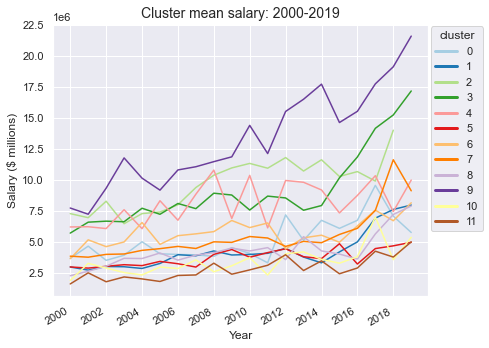

In [6]:
# plt.style.use("dark_background")
# plt.style.use("default")
# sns.set()
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(x='year', y='salary', data=salary_means, hue='label', palette='Paired', ax=ax)

ax.set_title('Cluster mean salary: 2000-2019', fontsize=14)
legend = plt.legend(title='cluster', bbox_to_anchor=(1.16, 1.01), loc='upper right', fancybox=True)

for line in legend.get_lines():
    line.set_linewidth(3)


ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(range(2000,2020, 2))
ax.set_ylabel('Salary ($ millions)', fontsize=12)

ax.ticklabel_format(axis='y', scilimits=(6,6))
# ax.ticklabel_format(axis='y', style='plain')

fig.autofmt_xdate()
plt.tight_layout()
# fig.savefig('plots/mean_cluster_salary.png');

### Create plot of normalized % of salary each cluster represents each year

<AxesSubplot:xlabel='year', ylabel='salary'>

Text(0.5, 1.0, 'Percent of total NBA salaries paid to each cluster: 2000-2019')

Text(0.5, 0, 'Year')

Text(0, 0.5, '% of total NBA Salary')

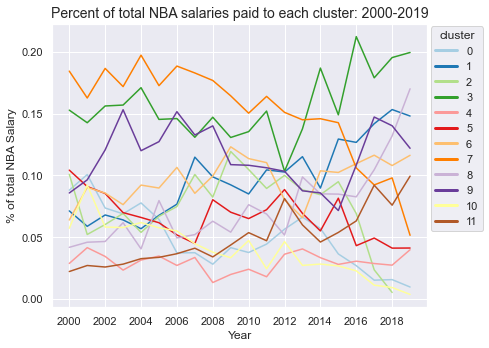

In [7]:
# salary_yearly_tots = df.set_index('year').drop(2020)
salary_yearly_tots = df_salary.groupby('year')
salary_yearly_tots = salary_yearly_tots[['salary']].sum()
# salary_yearly_tots

year_cluster_groups = df_salary.groupby(['year', 'label'])
year_cluster_salary_tots = year_cluster_groups[['salary']].sum()
year_cluster_salary_pcts = year_cluster_salary_tots / salary_yearly_tots


fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(x='year', y='salary', data=year_cluster_salary_pcts, ax=ax, hue='label', palette='Paired')
ax.set_title('Percent of total NBA salaries paid to each cluster: 2000-2019', fontsize=14)

legend = ax.legend(title='cluster', bbox_to_anchor=(1.163, 1.01), loc='upper right', fancybox=True)
for line in legend.get_lines():
    line.set_linewidth(3)

ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(range(2000,2020, 2))
ax.set_ylabel('% of total NBA Salary', fontsize=12)
plt.tight_layout()

# fig.savefig('plots/cluster_percent_total_salary.png');

### Do a stacked bar chart of pcts each year ???

In [294]:
# # salary_yearly_tots = df.set_index('year').drop(2020)
# salary_yearly_tots = df_salary.groupby('year')
# salary_yearly_tots = salary_yearly_tots[['salary']].sum()
# # salary_yearly_tots

# year_cluster_groups = df_salary.groupby(['year', 'label'])
# year_cluster_salary_tots = year_cluster_groups[['salary']].sum()
# year_cluster_salary_pcts = year_cluster_salary_tots / salary_yearly_tots



# ################## Having trouble

# # year_cluster_salary_pcts.plot.bar(stacked=True) #, x='year', y='salary', hue='label')
# # sns.barplot(data=year_cluster_salary_pcts, x='year', y='salary', hue='label')
# new = year_cluster_salary_pcts.reset_index().set_index('label')
# new['label'] = new.index
# new.plot(kind='bar', stacked='true', x='year', y='salary', data=)


# # year_cluster_salary_pcts.plot(kind='bar', stacked='true',)

# # sns.barplot(x='year', y='salary', data=new, hue='label', stacked=True)
# # sns.barplot(data=year_cluster_salary_pcts, y='salary', hue='label')
# # plt.show()

# ###########################


# # fig, ax = plt.subplots(figsize=(7,5))
# # sns.lineplot(x='year', y='salary', data=year_cluster_salary_pcts, ax=ax, hue='label', palette='Paired')
# # ax.set_title('% of total NBA salary for clusters by year', fontsize=14)
# # plt.legend(title='cluster', bbox_to_anchor=(1.163, 1.01), loc='upper right', fancybox=True)
# # ax.set_xlabel('Year', fontsize=12)
# # ax.set_xticks(range(2000,2020, 2))
# # ax.set_ylabel('% of total NBA Salary', fontsize=12)
# # plt.tight_layout()
# # fig.savefig('plots/cluster_percent_total_salary.png');

### Now need number of players in each cluster for each year

<AxesSubplot:xlabel='year'>

Text(0.5, 1.0, 'Number of players in each cluster: 2000-2020')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of players')

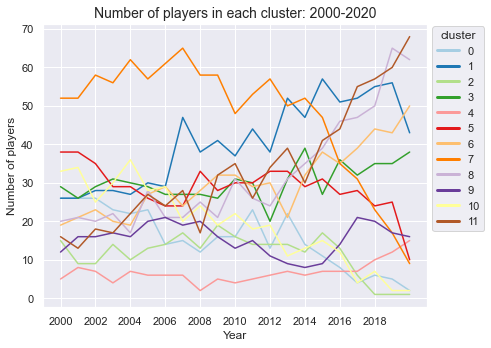

In [8]:
total_players_each_cluster_yearly = df.groupby(['year', 'label'])
# total_players_each_cluster_yearly = total_players_each_cluster_yearly[['g']].count()
total_players_each_cluster_yearly = total_players_each_cluster_yearly.size()
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(x='year', y=total_players_each_cluster_yearly, hue='label', data=total_players_each_cluster_yearly, ax=ax, palette='Paired')
ax.set_title('Number of players in each cluster: 2000-2020', fontsize=14)

legend = ax.legend(title='cluster', bbox_to_anchor=(1.163, 1.01), loc='upper right', fancybox=True)
for line in legend.get_lines():
    line.set_linewidth(3)

ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(range(2000,2020, 2))
ax.set_ylabel('Number of players', fontsize=12)
plt.tight_layout()
# fig.savefig('plots/number_players_per_cluster_each_year.png');

In [190]:
## Double check process

year_cluster_salary_tots
print()
salary_yearly_tots
print()
year_cluster_salary_tots / salary_yearly_tots
print()
(year_cluster_salary_tots / salary_yearly_tots).sum(level='year')

## Checks out

salary
year label             
2000 0       95067963.0
     1       76946760.0
     2      108988570.0
     3      165143741.0
     4       30952887.0
...                 ...
2019 7      154856460.0
     8      512219005.0
     9      367113094.0
     10      10700520.0
     11     299173301.0

[239 rows x 1 columns]

,salary
year,
2000,1.081312e+09
2001,1.199720e+09
2002,1.236979e+09
2003,1.306719e+09
2004,1.351996e+09
2005,1.440563e+09
2006,1.496155e+09
2007,1.583482e+09
2008,1.637503e+09


salary
year label          
2000 0      0.087919
     1      0.071161
     2      0.100793
     3      0.152725
     4      0.028625
...              ...
2019 7      0.051398
     8      0.170009
     9      0.121847
     10     0.003552
     11     0.099298

[239 rows x 1 columns]

,salary
year,
2000,1.0
2001,1.0
2002,1.0
2003,1.0
2004,1.0
2005,1.0
2006,1.0
2007,1.0
2008,1.0


In [223]:
plt.style.use("default")
sns.set_theme()

In [187]:

95067963.0/1.081312e+09
76946760.0/1.081312e+09
print()
367113094.0 /3.012894e+09
10700520.0/3.012894e+09


0.08791908625817525

0.07116055310585659

0.12184733150253543

0.0035515753292349483

In [144]:
ax.get_yticks()

array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
       15000000., 17500000., 20000000., 22500000., 25000000.])

In [13]:
df.isna().sum().sort_values(ascending=False)

pc_28                     0
fg3_pct                   0
drawn_shooting_per_min    0
astd_pts_per_min          0
and1s_per_min             0
                         ..
cluster_3                 0
cluster_2                 0
cluster_1                 0
cluster_0                 0
player_id                 0
Length: 145, dtype: int64

## Clusters vs. traditional position

## Value and production trends

In [9]:
def plot_cluster_means_bar(df, stat, ax=None):
    s = sns.barplot(x='label', y=stat, data=df, palette='Paired', ax=ax )  # ci controls the error bars, can be sd, 68, etc. 'ci=None'
    s.set_title('mean ' + stat + ' by cluster', fontsize=14, )
    s.set_xlabel('Cluster')
#     plt.tight_layout()    

In [23]:
## can see if there are any major differences over consecutive 10 year periods
df_2000_2009 = df[df['year']<2010]
df_2010_2020 = df[df['year']>=2010]

df_2000_2009.shape
df_2010_2020.shape

(2999, 145)

(3542, 145)

In [10]:
df_plots = df.copy()
shooting_stats_to_conv = ['fta_per_fga_pct',
                         'pct_fga_fg3a',
                          'pct_ast_fg2',
                          'ts_pct'
                         ]
df_plots.loc[:, shooting_stats_to_conv] = df_plots[shooting_stats_to_conv] * 100
df_plots[shooting_stats_to_conv]

,fta_per_fga_pct,pct_fga_fg3a,pct_ast_fg2,ts_pct
player,,,,
Tariq Abdul-Wahad 2000,29.9,3.6,57.6,47.7
Shareef Abdur-Rahim 2000,43.1,7.5,49.4,54.7
Ray Allen 2000,28.2,28.8,42.1,57.0
John Amaechi 2000,41.6,0.9,57.4,50.5
Derek Anderson 2000,35.9,20.7,43.8,54.2
...,...,...,...,...
Delon Wright 2020,24.3,30.9,30.8,55.4
Thaddeus Young 2020,12.0,36.9,56.8,52.1
Trae Young 2020,44.8,45.5,16.1,59.5


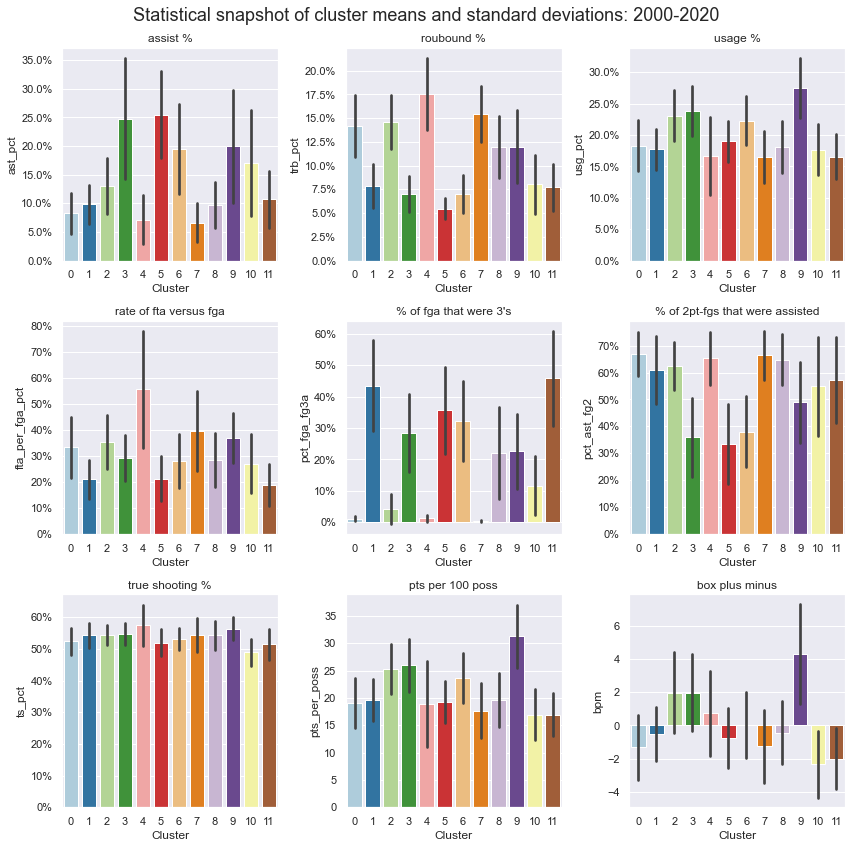

In [14]:
stats = [('ast_pct', 'assist %'), ('trb_pct', 'roubound %'), ('usg_pct', 'usage %'),
         ('fta_per_fga_pct', 'rate of fta versus fga'), ('pct_fga_fg3a', "% of fga that were 3's"), ('pct_ast_fg2', '% of 2pt-fgs that were assisted'),
         ('ts_pct', 'true shooting %'), ('pts_per_poss', 'pts per 100 poss'), ('bpm', 'box plus minus'), 
        ]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for (stat, title), ax in zip(stats, axes.reshape(-1)):
    sns.barplot(x='label', y=stat, data=df_plots, palette='Paired', ax=ax, ci='sd')  # ci controls the error bars, can be sd, 68, etc. 'ci=None'
    ax.set_title(title)
    ax.set_xlabel('Cluster')
    if 'pct' in stat:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))

    

fig.suptitle('Statistical snapshot of cluster means and standard deviations: 2000-2020', fontsize=18)
plt.tight_layout();


# fig.savefig('plots/cluster_mean_stats_snapshot.png');        

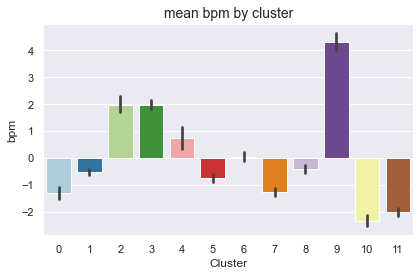

In [24]:
plot_cluster_means_bar(df, 'bpm')

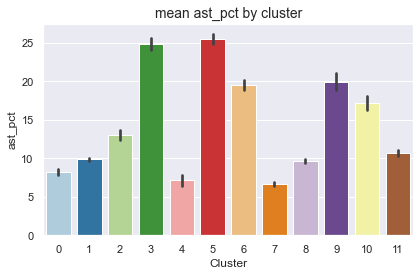

In [26]:
plot_cluster_means_bar(df, 'ast_pct')

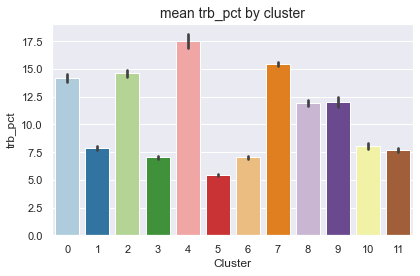

In [28]:
plot_cluster_means_bar(df, 'trb_pct')

In [62]:
# import matplotlib.ticker as mtick
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

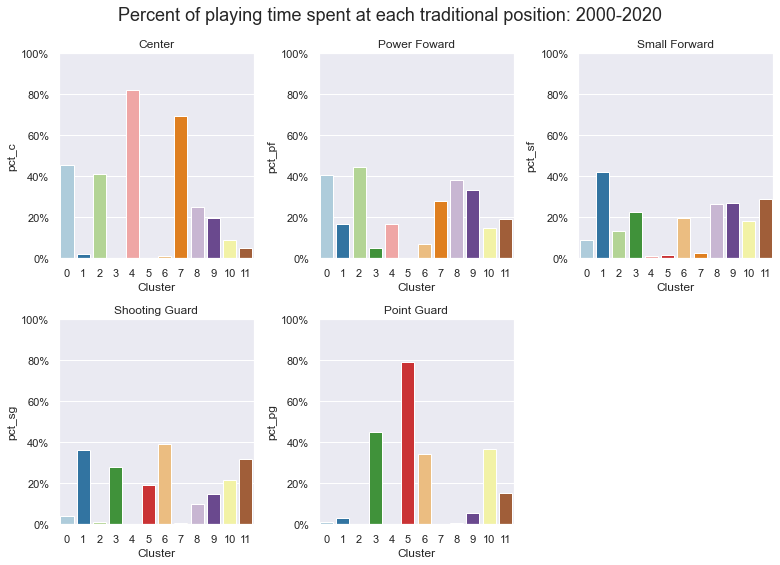

In [18]:
stats = [('pct_c', 'Center'),
         ('pct_pf', 'Power Foward'),
         ('pct_sf', 'Small Forward'),
         ('pct_sg', 'Shooting Guard'), 
         ('pct_pg', 'Point Guard'),
        ]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 8))

for (stat, title), ax in zip(stats, axes.reshape(-1)):
#     plot_cluster_means_bar(df, stat, ax)
    
    
    s = sns.barplot(x='label', y=stat, data=df, palette='Paired', ax=ax, ci=None )  # ci controls the error bars, can be sd, 68, etc. 'ci=None'
    ax.set_title(title)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(100.0))
    ax.set(ylim=(0,100))
    s.set_xlabel('Cluster')
    

fig.delaxes(axes.reshape(-1)[-1])
fig.suptitle('Percent of playing time spent at each traditional position: 2000-2020', fontsize=18)
plt.tight_layout()
fig.savefig('../plots/percent_playing_time_at_position.png');